In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import datetime

In [3]:
df_transaction = pd.read_csv('train_transaction.csv')


In [3]:
df_id = pd.read_csv("train_identity.csv")

In [3]:
df_transaction_test = pd.read_csv("test_transaction.csv")
df_id_test = pd.read_csv("test_identity.csv")

In [4]:
train = df_transaction.merge(df_id, how='left', left_index=True, right_index=True)
test = df_transaction_test.merge(df_id_test,how="left",left_index=True,right_index=True)

In [5]:
del df_transaction, df_transaction_test, df_id, df_id_test

In [6]:
train.head()

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
isfraud = train.isFraud
train = train.drop(["TransactionID_x","TransactionID_x","isFraud"],axis=1)

In [8]:
train["isFraud"] = isfraud

In [9]:
test = test.drop(["TransactionID_x","TransactionID_x"],axis=1)

In [108]:
pd.options.display.max_columns = None
df_transaction.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
class cleaning(object):
    
    def __init__(self,df):
        self.all_na = df.isnull().sum()/df.shape[0]

    def clean_na(self,df):
        self.less_na = all_na[all_na < 0.90]
        return df.loc[:,less_na]
    
    def subset(self,df,index):
        return df.iloc[:,index]

In [ ]:
# only small percentage of values are fraudalent.
(df_transaction.isFraud.value_counts() / df_transaction.shape[0] ) *100

In [ ]:
#not removing columns simply because it has more NA
#maybe more values in less number of rows can help us detect fraud
#lets compare NAs in both tables fraud=0 and fraud=1
df_isfraud_yes = df_transaction[df_transaction.isFraud==1]
df_isfraud_no = df_transaction[df_transaction.isFraud==0]

comparision = cleaning(df_isfraud_no)
values_no = comparision.all_na.values
comparision = cleaning(df_isfraud_yes)
values_yes = comparision.all_na.values


In [ ]:
# here I computed percentage of na values in both fradualant and non fraudalent dataframe
# this procudeure was to identify if let's say whole columns had 90% missing values
# but rest 10% belongs to fraudalent dataset. That is why this was important to analyse indipendently
pd.set_option('display.max_rows', 500)
values = pd.DataFrame(values_no,values_yes).reset_index(inplace=False)
values.columns = ["fraud_no","fraud_yes"]
values["difference"] = ((values.fraud_no - values.fraud_yes) / values.fraud_no ) * 100 
values.difference[values.difference.isna()] = 0
values = values[(values.difference >= 0) & (values.fraud_no < 0.50) & (values.fraud_yes < 0.50)]
index_values = values.index
index_values

In [ ]:
# here I am calling the function subset in thr cleaning class
comparision = cleaning(df_transaction)
df_transaction = comparision.subset(df_transaction,index_values)
df_transaction.head()

In [ ]:
times=[]

def time_conversion(df):
    for i in range(df.shape[0]):
        t = df.TransactionDT[i]
        t = datetime.datetime.fromtimestamp( t )
        t = t.replace()
        times.append(t)
    df.TransactionDT = times
    return df

df_transaction = time_conversion(df_transaction)
df_transaction.head()

In [ ]:
time = pd.Series( (round((df_transaction.TransactionDT /(60*60)))))

In [ ]:
anomalies = pd.Series(df_transaction.isFraud)

In [ ]:
time_anomiles = pd.concat([time,anomalies],axis=1)
plt.plot(time_anomiles.)

In [ ]:
time_anomiles = pd.concat([time,anomalies],axis=1)
time_anomiles = time_anomiles.groupby("TransactionDT").sum().reset_index()
plt.figure(figsize=(15,7))
plt.plot(time_anomiles.TransactionDT,time_anomiles.isFraud)


In [ ]:
time_anomiles

In [ ]:
import datetime
t = 86458
t = (datetime.datetime.fromtimestamp(t))
t = t.replace()
print(t)

In [ ]:
df_transaction.head()

In [13]:
try1 = df_transaction.iloc[:,1:10]
try1 = try1.drop("ProductCD",axis=1)
try1.head()

for i in range(2,(try1.shape[1]  )):
    try1.iloc[:,i] = try1.iloc[:,i].fillna(try1.iloc[:,i].median())

try1.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5
0,0,86400,68.5,13926,NaN,150.0,discover,142.0
1,0,86401,29.0,2755,404.0,150.0,mastercard,102.0
2,0,86469,59.0,4663,490.0,150.0,visa,166.0
3,0,86499,50.0,18132,567.0,150.0,mastercard,117.0
4,0,86506,50.0,4497,514.0,150.0,mastercard,102.0


In [14]:
try1 = try1.drop(["card4","isFraud"],axis=1)
try1.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5
0,86400,68.5,13926,NaN,150.0,142.0
1,86401,29.0,2755,404.0,150.0,102.0
2,86469,59.0,4663,490.0,150.0,166.0
3,86499,50.0,18132,567.0,150.0,117.0
4,86506,50.0,4497,514.0,150.0,102.0


In [15]:
try1["isFraud"] = df_transaction.isFraud
try1.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,isFraud
0,86400,68.5,13926,NaN,150.0,142.0,0
1,86401,29.0,2755,404.0,150.0,102.0,0
2,86469,59.0,4663,490.0,150.0,166.0,0
3,86499,50.0,18132,567.0,150.0,117.0,0
4,86506,50.0,4497,514.0,150.0,102.0,0


In [87]:
import sklearn 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import statsmodels.api as stats
import matplotlib.pyplot as plt
import random 

class predictions(object):
    
    def __init__(self):
        return
    
    def data_munging(df):
        return
    def visulizations(df):
        return
    
    def boost_simple(df):
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,:-1],df.isFraud)
        model = xgb.XGBClassifier()
        learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
        param_grid = dict(learning_rate=learning_rate)
        kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
        grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
        grid_result = grid_search.fit(train_x, train_y)
        
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params = grid_result.cv_results_['params']
        for mean, stdev, param in zip(means, stds, params):
            print("%f (%f) with: %r" % (mean, stdev, param))


    def encoding(self,df):
        self.obj = [columns for columns in df.columns if df[columns].dtypes=="object"]
        le = LabelEncoder()
        for col in self.obj:
            df[col] = le.fit_transform(df[col].astype("str").values)
        return df
    
    def oversampeling(x,y):
        smt = SMOTE()
        x,y = smt.fit_sample(x,y)
        return x,y
    
    def feature_selection(self,df,num_features):
        df = df.fillna(0)
        
        best = SelectKBest(chi2,num_features)
        fit = best.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
        fit = pd.DataFrame(fit)
        
        #score = pd.DataFrame(fit.scores_)
        #cols = pd.DataFrame(df.columns)
        #fs = pd.concat([score,cols],axis=1)
        #fs.columns = ["score","col"]
        #fs = fs.sort_values("score",ascending=False)
        #top = fs["col"]
        #df = df.loc[:,top]
        return fit
    
    def normalize(self,df):
        df_fraud = df[df.isFraud==1]
        df_non_fraud = df[df.isFraud!=1]
        
        rand = random.sample(range(0,df_non_fraud.shape[0]),df_fraud.shape[0])
        df_non_fraud = df_non_fraud.iloc[rand]
        
        return pd.concat([df_non_fraud,df_fraud])
    
    def boosting(self,df,classes):
        df = df.fillna(0)
        train_x,test_x , train_y,test_y = train_test_split(df,classes)
        smt = SMOTE()
        train_x,train_y = smt.fit_sample(train_x,train_y)
        train_x = pd.DataFrame(train_x)
        train_x.columns = test_x.columns
        model = xgb.XGBClassifier()
        
        #cv = cross_validate(model,train_x,train_y)
        
        model.fit(train_x,train_y)
        pred_prob = model.predict_proba(test_x)
        pred_prob = pred_prob[:,1]
        pred = model.predict(test_x)
        acc = accuracy_score(test_y,pred)
        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred_prob)
        report = classification_report(pred,test_y)
        con_mat = confusion_matrix(test_y,pred)
        
        return auc, fpr,tpr,therashold, report, acc, con_mat
        
        
    
    def logistic(self,df):
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,2:8],df.isFraud,random_state=57,test_size=0.3)
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,:-1],df.isFraud,random_state=57,test_size=0.3)
        smt = SMOTE()
        train_x,train_y = smt.fit_sample(train_x,train_y)
        
        model = LogisticRegression()
        model.fit(train_x,train_y)
        pred_prob = model.predict_proba(test_x)
        pred_prob = pred_prob[:,1]
        pred = model.predict(test_x)
        acc = accuracy_score(test_y,pred)
        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred_prob)
        report = classification_report(pred,test_y)
        con_mat = confusion_matrix(test_y,pred)
        return auc, fpr,tpr,therashold, report, acc, con_mat
        return acc
    
    def randomforest(df):
        train_x,test_x , train_y,test_y = train_test_split(df.iloc[:,2:8],df.isFraud,random_state=57,test_size=0.3)
        model = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=0)
        model.fit(train_x,train_y)
        pred = model.predict_proba(test_x)
        acc = accuracy_score(test_y,pred)
        pred = pred[:,1]        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred)
        return auc, fpr,tpr,therashold


In [7]:
df_transaction = df_transaction.drop(["TransactionID"],axis=1)

In [8]:
df_transaction = df_transaction.fillna(0)

In [4]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
pred = predictions()

df_transaction = pred.encoding(df_transaction)

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


x = df_transaction.iloc[:,17:30]
y = df_transaction.isFraud
y= pd.get_dummies(y).values
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25, random_state=28)

numb_features = train_x.shape[1]
numb_class = train_y.shape[1]

X= tf.placeholder(tf.float32,[None,numb_features])
Y_class = tf.placeholder(tf.float32,[None,numb_class])

weights = tf.Variable(tf.zeros([numb_features,numb_class]))
bais = tf.Variable(tf.zeros([1,numb_class]))

matrix_multiplication = tf.matmul(X,weights)
addition = tf.add(matrix_multiplication,bais)
result  = tf.nn.sigmoid(addition)

epocs = 500

#learning_rate = tf.train.exponential_decay(learning_rate=0.1)
cost = tf.nn.l2_loss(result - Y_class)

training = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

correct_prediction = tf.equal(tf.argmax(result,1),tf.argmax(train_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

acc_values = []
cost_values = []
epoc = []
old_cost = 0

for i in range(epocs):
    sess.run(training,feed_dict={X:train_x,Y_class:train_y})

    if i%10==0:
        epoc.append(i)
        accu , costs = sess.run([accuracy,cost],feed_dict={X:train_x,Y_class:train_y}) 

        acc_values.append(accu)
        cost_values.append(costs)

        diff = abs(costs-old_cost)
        old_cost = costs

        print("step number {}, accuracy is {}, cost is {}, change in cost {}".format(i,accu,costs,diff))

#roc_curve(result, train_y)



Instructions for updating:
Colocations handled automatically by placer.
step number 0, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 15376.0
step number 10, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 20, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 30, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 40, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 50, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 60, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 70, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 80, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 90, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0
step number 100, accuracy is 0.9652837514877319, cost is 15376.0, change in cost 0.0


In [ ]:
print("final accuracy is {}".format(sess.run(accuracy,feed_dict={X:test_x,Y_class:test_y})))

area under the curve0.8104952350559189
total accuracy0.8110723964382501
confusion matrix is[[4431  828]
 [1124 3949]] 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5555
           1       0.78      0.83      0.80      4777

    accuracy                           0.81     10332
   macro avg       0.81      0.81      0.81     10332
weighted avg       0.81      0.81      0.81     10332



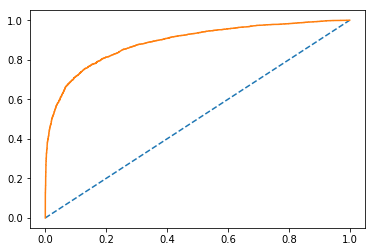

In [143]:
pred = predictions()
#df = pred.feature_selection(c_only,8)
#df["isFraud"] = df_transaction.isFraud

df = pred.normalize(df_transaction)

df = pred.encoding(df)
df = df.drop(["isFraud"],axis=1)

#df = pred.feature_selection(df,100)
df["isFraud"] = df_transaction.isFraud


auc, fpr,tpr,therashold, report, accuracy, con_mat = pred.boosting(df.iloc[:,:-1],df.isFraud)
print("area under the curve{}".format(auc))
print("total accuracy{}".format(accuracy))
print("confusion matrix is{} ".format(con_mat))
print(report)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr)

In [134]:
df = df.fillna(0)

In [14]:
from sklearn.preprocessing import LabelEncoder
obj = [columns for columns in train.columns if train[columns].dtypes=="object"]
le = LabelEncoder()
for col in obj:
    train[col] = le.fit_transform(train[col].astype("str").values)

In [32]:
pred = predictions()
df = pred.feature_selection(v_only.fillna(0),100)

In [41]:
best = SelectKBest(chi2,k=100)
fit = best.fit_transform(v_only.iloc[:,:-1].fillna(0),v_only.iloc[:,-1])


AttributeError: 'numpy.ndarray' object has no attribute 'scores_'

In [3]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
param_grid

{'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

In [ ]:
predictions = predictions

accuracy =  predictions.logistic(try1)
accuracy

In [ ]:
# cross check fraud and productCD

pd.crosstab(df_transaction.isFraud,df_transaction.ProductCD)

In [ ]:
test = pd.read_csv("test_transaction.csv")

In [ ]:
#there is difference between dimension reduction(PCA) and feature selection(RIDGE LASSO)
# FEATURE SELECTION SHOULD BE PERFORMED IN EACH LOOP OF CROSS VALIDATION. 
#Do not perform feature selction only once and then use cross-validation, this will elad to overfitting.
# correlation calclatino can also be helpful

In [ ]:
a = ["kshitiz","sirohi"," itraz"]
b = "it"
for i in a:
    print(b in i)

In [ ]:
c= "C"
columns_c = df_transaction.iloc[:,[True for i in df_transaction.columns if c in i ]]

In [8]:
c_only.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0


In [4]:
try2 = df_transaction.iloc[:,10:]
try2["isFraud"] = df_transaction.isFraud

In [ ]:
try2.head()

In [5]:

c_only = try2.filter(like="C")
c_only["isFraud"]= try2.isFraud

d_only = try2.filter(like="D")
d_only["isFraud"] = try2.isFraud
d_only = d_only.fillna(0)

m_only = try2.filter(like="M")
m_only["isFraud"] = try2.isFraud
m_only = m_only.fillna(0)

v_only = try2.filter(like="V")
v_only["isFraud"] =try2.isFraud
v_only = v_only.fillna(0)

C:\Users\ksiro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ksiro\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ksiro\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(v_only.iloc[:,:-1],v_only.isFraud,test_size=.3)
model = LogisticRegression()
rfe = RFE(model,100)
#rfe = rfe.fit(trainx,trainy)
print(rfe.support_)

#model.fit(trainx,trainy)
#pred = model.predict(testx)
#acc = accuracy_score(pred,testy)
#acc

In [ ]:
print(classification_report(testy,pred))

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

best = SelectKBest(chi2,4)
fit = best.fit(c_only.iloc[:,:-1],c_only.iloc[:,-1])
score = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(c_only.columns)
fs = pd.concat([score,cols],axis=1)
fs.columns = ["score","col"]
fs = fs.sort_values("score",ascending=False)
top100 = fs.head(30).col
c_only = c_only.loc[:,top100]



In [ ]:
v_only["isFraud"]= df_transaction.isFraud

In [ ]:
import numpy as np
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

In [ ]:
train_x,test_x , train_y,test_y = train_test_split(c_only.iloc[:,:-1],c_only.isFraud)
smt = SMOTE()
train_x,train_y = smt.fit_sample(train_x,train_y)
#model = xgb.XGBClassifier()
#model.fit(train_x,train_y)
#pred_prob = model.predict_proba(test_x)
#pred_prob = pred_prob[:,1]
#pred = model.predict(test_x)
#acc = accuracy_score(test_y,pred)

In [ ]:
acc

In [ ]:
train_x = pd.DataFrame(train_x)
train_x.columns= test_x.columns
train_x

In [31]:
#train_x,test_x , train_y,test_y = train_test_split(train.iloc[:,:-1],train.isFraud)

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest
import xgboost as xgb

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train.iloc[:,15:29], train.isFraud)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.101781 using {'learning_rate': 0.3}
-0.684352 (0.000005) with: {'learning_rate': 0.0001}
-0.612370 (0.000029) with: {'learning_rate': 0.001}
-0.262418 (0.000170) with: {'learning_rate': 0.01}
-0.107002 (0.000705) with: {'learning_rate': 0.1}
-0.103491 (0.000587) with: {'learning_rate': 0.2}
-0.101781 (0.001000) with: {'learning_rate': 0.3}


In [26]:
train = train.fillna(0)
best = SelectKBest(chi2,100)
fit = best.fit_transform(train.iloc[:,:-1],train.iloc[:,-1])
fit = pd.DataFrame(fit)

ValueError: Input X must be non-negative.

In [69]:
pred = predictions()
x,y = pred.normalize(df_transaction)

In [112]:
d = pd.DataFrame({"a":[4,5,7,-3],"b":["a","g","g","t"]})
d

,a,b
0,4,a
1,5,g
2,7,g
3,-3,t


In [113]:
p = pd.DataFrame({"a":[44,52,43,23],"b":["aw","ge","gg","tr"]})


In [115]:
c = pd.concat([d,p])
c

,a,b
0,4,a
1,5,g
2,7,g
3,-3,t
0,44,aw
1,52,ge
2,43,gg
3,23,tr


In [125]:
c[c < 0 ]=0

TypeError: Cannot do inplace boolean setting on mixed-types with a non np.nan value

In [130]:
df = pd.DataFrame({'a': [0, -1, 2], 'b': [-3, 2, 1],
                           'c': ['foo', 'goo', 'bar']})
df[df < 0] 

,a,b,c
0,NaN,-3.0,foo
1,-1.0,NaN,goo
2,NaN,NaN,bar


In [131]:
df[df < 0].sum(x)

a           -1
b           -3
c    foogoobar
dtype: object